In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width: 98% !important }<style>"))

In [2]:
from utilities import *

In [3]:
import joblib
from sklearn.linear_model import LinearRegression

In [4]:
ble = read_ble('../Data/ble.csv')
pin = read_pin('../Data/pin.csv')

In [5]:
data = read_data('../Data/rssi_2.csv')
data

All beacons: ['0117C55D14E4']
Selecting all


,time,location,C400A2E19293,CD4533FFC0E1,D2B6503554D7,DB8B36A69C56,DD697EA75B68,DF231643E227,E13B805C6CB0,E43355CA8B96,E6D9D20DD197,E8FD0B453DC4,E96AF2C858BA,EC72840D9AD3,F1307ECB3B90,F1EDAF28E08A,F69A86823B96,FB2EE01C18CE,FDAE5980F28C
0,2020-01-09 07:53:05.386,V1_24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-67.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-09 07:53:05.399,V1_24,NaN,NaN,NaN,NaN,NaN,NaN,-75.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-09 07:53:05.449,V1_24,-89.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-09 07:53:05.808,V1_24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-71.0,NaN
4,2020-01-09 07:53:05.809,V1_24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-87.0,NaN,NaN,NaN,-68.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63702,2020-01-09 09:24:45.530,V1_30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-87.0,NaN
63703,2020-01-09 09:24:45.641,V1_30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63704,2020-01-09 09:24:45.642,V1_30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-75.0,NaN,-83.0,NaN,NaN,NaN,NaN,NaN,NaN
63705,2020-01-09 09:24:45.667,V1_30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-72.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data.describe()

,C400A2E19293,CD4533FFC0E1,D2B6503554D7,DB8B36A69C56,DD697EA75B68,DF231643E227,E13B805C6CB0,E43355CA8B96,E6D9D20DD197,E8FD0B453DC4,E96AF2C858BA,EC72840D9AD3,F1307ECB3B90,F1EDAF28E08A,F69A86823B96,FB2EE01C18CE,FDAE5980F28C
count,3646.000000,3537.000000,3099.000000,4517.000000,3661.000000,4564.000000,4604.00000,3901.000000,6579.000000,2505.000000,4971.000000,3899.000000,5547.000000,5015.000000,5494.000000,2709.000000,3271.000000
mean,-72.730938,-74.122420,-76.493385,-71.553907,-72.016389,-73.576468,-74.93397,-73.868752,-77.253686,-77.755289,-75.916516,-72.306745,-68.139535,-75.568096,-73.909174,-81.865264,-74.347906
std,8.090962,6.738867,6.554893,8.777439,6.530111,8.030736,9.10565,8.739254,11.568648,8.906306,9.651288,7.310162,7.839906,9.398742,8.537659,8.919793,8.096212
min,-97.000000,-98.000000,-98.000000,-98.000000,-96.000000,-98.000000,-98.00000,-98.000000,-98.000000,-98.000000,-98.000000,-97.000000,-96.000000,-98.000000,-98.000000,-98.000000,-98.000000
25%,-77.000000,-77.000000,-80.000000,-78.000000,-77.000000,-80.000000,-81.00000,-80.000000,-87.000000,-84.000000,-84.000000,-77.000000,-73.000000,-82.000000,-80.000000,-90.000000,-80.000000
50%,-72.000000,-73.000000,-76.000000,-71.000000,-72.000000,-73.000000,-75.00000,-73.000000,-78.000000,-77.000000,-75.000000,-72.000000,-66.000000,-75.000000,-74.000000,-82.000000,-73.000000
75%,-68.000000,-69.000000,-72.000000,-64.000000,-67.000000,-66.000000,-70.00000,-68.000000,-70.000000,-71.000000,-67.000000,-66.500000,-62.000000,-70.000000,-67.000000,-72.000000,-69.000000
max,-59.000000,-63.000000,-61.000000,-56.000000,-60.000000,-59.000000,-54.00000,-56.000000,-55.000000,-63.000000,-61.000000,-55.000000,-54.000000,-57.000000,-55.000000,-67.000000,-59.000000


In [7]:
data.sort_values("time", inplace=True)
data_rolled = data.groupby("location").rolling(15, min_periods=1).mean().reset_index()

In [8]:
data_imputed = data_rolled.set_index("location").groupby("location").ffill()
data_imputed.fillna(-100, inplace=True)
data_imputed.reset_index(inplace=True)

In [9]:
data_imputed

,location,level_1,C400A2E19293,CD4533FFC0E1,D2B6503554D7,DB8B36A69C56,DD697EA75B68,DF231643E227,E13B805C6CB0,E43355CA8B96,E6D9D20DD197,E8FD0B453DC4,E96AF2C858BA,EC72840D9AD3,F1307ECB3B90,F1EDAF28E08A,F69A86823B96,FB2EE01C18CE,FDAE5980F28C
0,V1_10,24997,-72.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.00,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0
1,V1_10,24998,-72.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.00,-100.0,-100.0,-100.0,-100.0,-65.0,-100.0,-100.0,-100.0,-100.0
2,V1_10,24999,-72.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.00,-100.0,-100.0,-100.0,-100.0,-62.5,-100.0,-100.0,-100.0,-100.0
3,V1_10,25000,-72.0,-76.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.00,-100.0,-100.0,-100.0,-100.0,-62.5,-100.0,-100.0,-100.0,-100.0
4,V1_10,25001,-72.0,-76.0,-100.0,-66.0,-100.0,-100.0,-100.0,-100.00,-100.0,-100.0,-100.0,-100.0,-62.5,-100.0,-100.0,-100.0,-100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63702,V1_9,31039,-75.5,-90.0,-81.0,-78.0,-85.0,-91.0,-87.0,-61.50,-96.0,-82.0,-91.0,-73.0,-75.0,-68.0,-84.0,-94.0,-67.0
63703,V1_9,31040,-75.5,-90.0,-81.0,-78.0,-85.0,-89.0,-87.0,-61.50,-96.0,-82.0,-91.0,-72.0,-75.0,-68.0,-84.0,-94.0,-67.0
63704,V1_9,31041,-79.0,-90.0,-81.0,-78.0,-85.0,-89.0,-87.0,-61.50,-96.0,-82.0,-91.0,-72.0,-75.0,-68.0,-83.0,-94.0,-67.0
63705,V1_9,31042,-79.0,-90.0,-81.0,-78.0,-85.0,-89.0,-87.0,-59.25,-96.0,-82.0,-91.0,-72.0,-75.0,-68.0,-83.0,-94.0,-67.0


In [10]:
data_imputed[scanners] = min_max_scaling(data_imputed[scanners])

In [11]:
data_imputed["X"] = data_imputed["location"].apply(lambda x: pin[x]["X"])
data_imputed["Y"] = data_imputed["location"].apply(lambda x: pin[x]["Y"])

In [12]:
data_imputed

,location,level_1,C400A2E19293,CD4533FFC0E1,D2B6503554D7,DB8B36A69C56,DD697EA75B68,DF231643E227,E13B805C6CB0,E43355CA8B96,...,E8FD0B453DC4,E96AF2C858BA,EC72840D9AD3,F1307ECB3B90,F1EDAF28E08A,F69A86823B96,FB2EE01C18CE,FDAE5980F28C,X,Y
0,V1_10,24997,0.466667,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,...,0.0,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.00,11.17660,5.29753
1,V1_10,24998,0.466667,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,...,0.0,0.00,0.000000,0.583333,0.000000,0.000000,0.0,0.00,11.17660,5.29753
2,V1_10,24999,0.466667,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,...,0.0,0.00,0.000000,0.625000,0.000000,0.000000,0.0,0.00,11.17660,5.29753
3,V1_10,25000,0.466667,0.400000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,...,0.0,0.00,0.000000,0.625000,0.000000,0.000000,0.0,0.00,11.17660,5.29753
4,V1_10,25001,0.466667,0.400000,0.000000,0.566667,0.00,0.000000,0.000000,0.000000,...,0.0,0.00,0.000000,0.625000,0.000000,0.000000,0.0,0.00,11.17660,5.29753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63702,V1_9,31039,0.408333,0.166667,0.316667,0.366667,0.25,0.150000,0.216667,0.641667,...,0.3,0.15,0.450000,0.416667,0.533333,0.266667,0.1,0.55,8.17867,5.28213
63703,V1_9,31040,0.408333,0.166667,0.316667,0.366667,0.25,0.183333,0.216667,0.641667,...,0.3,0.15,0.466667,0.416667,0.533333,0.266667,0.1,0.55,8.17867,5.28213
63704,V1_9,31041,0.350000,0.166667,0.316667,0.366667,0.25,0.183333,0.216667,0.641667,...,0.3,0.15,0.466667,0.416667,0.533333,0.283333,0.1,0.55,8.17867,5.28213
63705,V1_9,31042,0.350000,0.166667,0.316667,0.366667,0.25,0.183333,0.216667,0.679167,...,0.3,0.15,0.466667,0.416667,0.533333,0.283333,0.1,0.55,8.17867,5.28213


In [13]:
def plot_RSSI_Coor(data, coor, scanner):
#     for loc in data['location'].unique():
#         plt.scatter(data[data['location'] == loc][coor], data[data['location'] == loc][scanner], alpha=1, label=loc)
    plt.scatter(data[coor], data[scanner], alpha=0.1)
    plt.xlabel(coor)
    plt.ylabel('RSSI')
    plt.title('{}\nLocation: ({:.2f}, {:.2f})'.format(scanner, ble[scanner]['X'], ble[scanner]['Y']))
    # plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

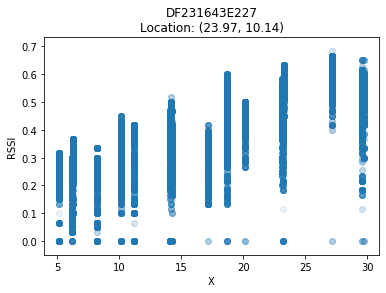

In [14]:
plot_RSSI_Coor(data_imputed, 'X', 'DF231643E227')

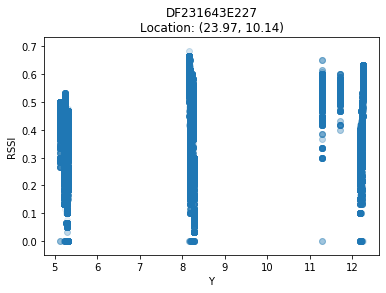

In [15]:
plot_RSSI_Coor(data_imputed, 'Y', 'DF231643E227')

In [16]:
R1824 = data_imputed[['DF231643E227', 'X', 'Y']]

In [17]:
dx = R1824['X'] - ble['DF231643E227']['X']
dy = R1824['Y'] - ble['DF231643E227']['Y']
R1824['D'] = np.sqrt(np.square(dx) + np.square(dy))

/home/mimos/anaconda3/envs/loc/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


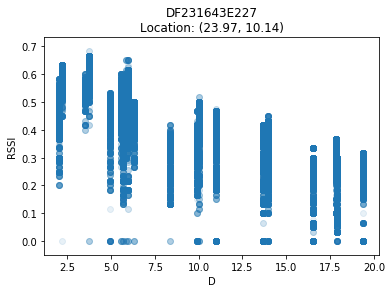

In [18]:
plot_RSSI_Coor(R1824, 'D', 'DF231643E227')

In [19]:
reg = LinearRegression()
reg.fit(R1824['D'].values.reshape((-1,1)), R1824['DF231643E227'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

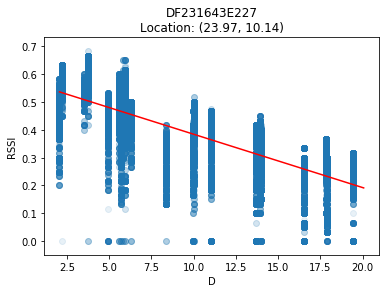

In [20]:
plot_RSSI_Coor(R1824, 'D', 'DF231643E227')
x = np.arange(R1824['D'].min(), R1824['D'].max() + 1).reshape((-1,1))
plt.plot(x, reg.predict(x), c='r')

In [21]:
for s in scanners:
    try:
        scanner = data_imputed[[s, 'X', 'Y']].copy()
        dx = scanner['X'] - ble[s]['X']
        dy = scanner['Y'] - ble[s]['Y']
        scanner['D'] = np.sqrt(np.square(dx) + np.square(dy))
        reg = LinearRegression()
        reg.fit(scanner['D'].values.reshape((-1,1)), scanner[s])

        reg_seq = joblib.load('../Models/linear_distance_models_2/{}.joblib'.format(s))
        print(s)
        print(reg.coef_[0] - reg_seq.coef_[0])
        print(reg.intercept_ - reg_seq.intercept_)
        print()
    except:
        pass

C400A2E19293
-0.002457460926939544
0.0675769300061928

CD4533FFC0E1
0.006355087002410106
-0.01474496892935162

DB8B36A69C56
-0.0010239775910309383
0.046555241388388624

DD697EA75B68
0.009717454519768881
-0.04270176571529094

DF231643E227
0.008142202503980397
-0.041210096859757295

E13B805C6CB0
0.013680212010278123
-0.07173344890899269

E43355CA8B96
-0.0020061176912178104
0.06343688607899522

E6D9D20DD197
0.003464443460016297
-0.026851673209932647

E8FD0B453DC4
-0.011192992140721631
0.19155758509200638

E96AF2C858BA
0.005519083118651312
-0.04491972385860499

EC72840D9AD3
0.0015252512238668053
0.01667392177314131

F1307ECB3B90
-0.0016513696992671648
0.04773808931570689

F1EDAF28E08A
-0.01279990803344648
0.24193914256011567

F69A86823B96
0.0011315696036333436
0.04978816854696411

FB2EE01C18CE
0.002213536160079476
-0.030992556391115533

FDAE5980F28C
0.001221005980698367
0.01626298264912296

